In [3]:
!pip install kaggle

# Make sure the Kaggle API is properly set up
import os
os.environ['KAGGLE_USERNAME'] = "parigyaarya"
os.environ['KAGGLE_KEY'] = "610651a4c202834f77788e5fb4764787"

# Download the dataset
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset 

 91%|█████████████████████████████████████▎   | 135M/149M [00:01<00:00, 108MB/s]
100%|█████████████████████████████████████████| 149M/149M [00:01<00:00, 111MB/s]


In [5]:
!pip install torchsummary

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import torchvision
import torch
from torchvision import transforms, datasets
import torchvision.models as models
from torch.utils.data import DataLoader
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [15]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

train_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Training'
validation_data_dir = '/kaggle/input/brain-tumor-mri-dataset/Testing'

img_height, img_width = 299, 299
input_shape=torch.Tensor((img_height, img_width))

classes = ('glioma','meningioma','notumour','pituitary')

In [12]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [16]:
# Define transformations
transform = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.CenterCrop((img_height, img_width)),
    transforms.ToTensor()
])

# Load datasets
train_dataset = ImageFolder(train_data_dir, transform=transform)
val_dataset = ImageFolder(validation_data_dir, transform=transform)

In [18]:
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True,num_workers=2)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size,num_workers=2)

This is a pituitary.


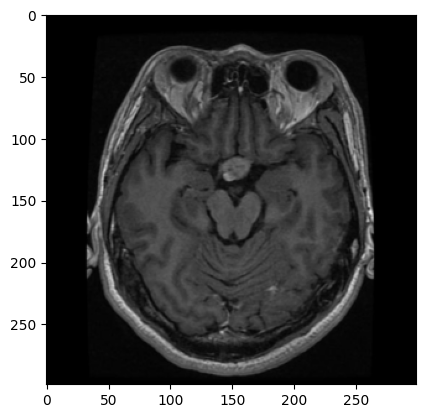

In [19]:
images,labels = next(iter(train_dataloader))
print('This is a {}.'.format(classes[labels[0]]))
plt.imshow(images[0].moveaxis(0,2))

 pituitary   notumour   notumour   notumour


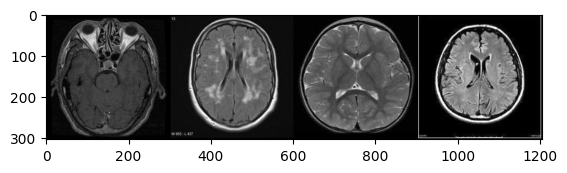

In [20]:
number_of_pics = 4
images,labels = next(iter(train_dataloader)) #load in a batch of data with the dataloader
imagegrid = torchvision.utils.make_grid(images[0:number_of_pics,:,:,:]) #join the images from the batch into one grid
print(' '.join('%10s' % classes[labels[j]] for j in range(number_of_pics)))
plt.imshow(imagegrid.moveaxis(0,2))
plt.show()

Hyperparameters: LR=0.01, WD=0.01, Model=resnet18
Epoch 1/20, Train Loss: 1.2096, Train Acc: 0.4545, Val Loss: 17.9606, Val Acc: 0.3089
Epoch 2/20, Train Loss: 0.9617, Train Acc: 0.6063, Val Loss: 2.0963, Val Acc: 0.3730
Epoch 3/20, Train Loss: 0.8895, Train Acc: 0.6357, Val Loss: 1.7863, Val Acc: 0.4455
Epoch 4/20, Train Loss: 0.8854, Train Acc: 0.6413, Val Loss: 3.3299, Val Acc: 0.3448
Epoch 5/20, Train Loss: 0.8453, Train Acc: 0.6591, Val Loss: 1.2753, Val Acc: 0.4447
Epoch 6/20, Train Loss: 0.8019, Train Acc: 0.6733, Val Loss: 1.8145, Val Acc: 0.4348
Epoch 7/20, Train Loss: 0.8208, Train Acc: 0.6602, Val Loss: 2.8788, Val Acc: 0.3089
Epoch 8/20, Train Loss: 0.8397, Train Acc: 0.6623, Val Loss: 7.7931, Val Acc: 0.3089
Epoch 9/20, Train Loss: 0.8323, Train Acc: 0.6583, Val Loss: 2.0746, Val Acc: 0.4157
Epoch 10/20, Train Loss: 0.7239, Train Acc: 0.7064, Val Loss: 0.7974, Val Acc: 0.6911
Epoch 11/20, Train Loss: 0.6695, Train Acc: 0.7404, Val Loss: 0.8363, Val Acc: 0.6545
Epoch 12/20,

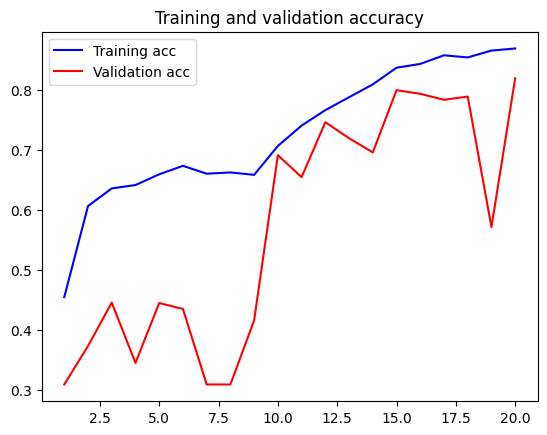

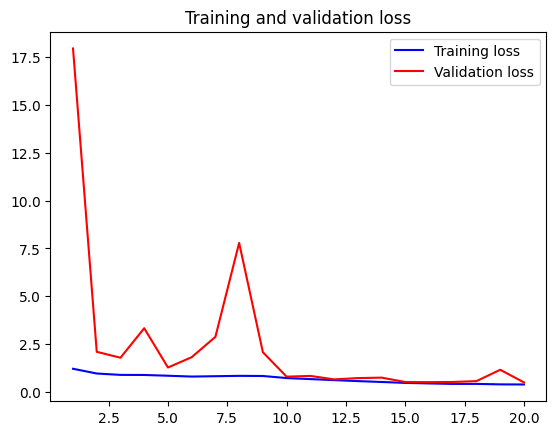

Hyperparameters: LR=0.01, WD=0.01, Model=resnet50


Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 138MB/s] 


Epoch 1/20, Train Loss: 1.1315, Train Acc: 0.5275, Val Loss: 2.1436, Val Acc: 0.3005
Epoch 2/20, Train Loss: 1.0343, Train Acc: 0.5525, Val Loss: 1.3424, Val Acc: 0.3646
Epoch 3/20, Train Loss: 0.9314, Train Acc: 0.6070, Val Loss: 1.4990, Val Acc: 0.5057
Epoch 4/20, Train Loss: 0.8828, Train Acc: 0.6303, Val Loss: 1.6353, Val Acc: 0.4104
Epoch 5/20, Train Loss: 0.8751, Train Acc: 0.6315, Val Loss: 1.4513, Val Acc: 0.2838
Epoch 6/20, Train Loss: 0.8452, Train Acc: 0.6434, Val Loss: 1.2206, Val Acc: 0.4928
Epoch 7/20, Train Loss: 0.8374, Train Acc: 0.6472, Val Loss: 1.7891, Val Acc: 0.4401
Epoch 8/20, Train Loss: 0.8165, Train Acc: 0.6549, Val Loss: 1.3457, Val Acc: 0.4546
Epoch 9/20, Train Loss: 0.8270, Train Acc: 0.6492, Val Loss: 1.0482, Val Acc: 0.5172
Epoch 10/20, Train Loss: 0.8315, Train Acc: 0.6521, Val Loss: 1.0986, Val Acc: 0.5141
Epoch 11/20, Train Loss: 0.8043, Train Acc: 0.6696, Val Loss: 5.0612, Val Acc: 0.3089
Epoch 12/20, Train Loss: 0.8254, Train Acc: 0.6632, Val Loss: 0

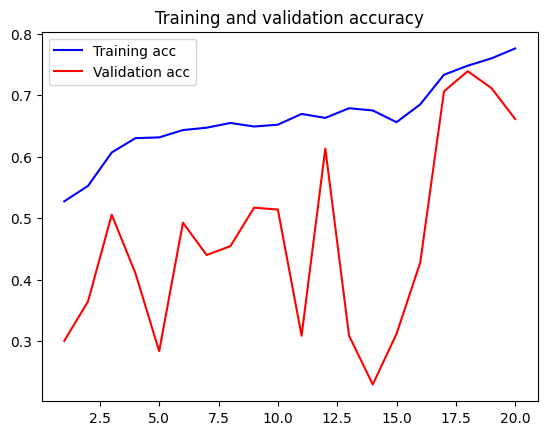

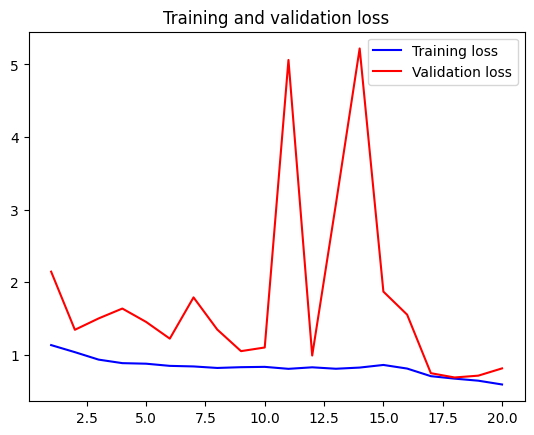

Hyperparameters: LR=0.01, WD=0.001, Model=resnet18
Epoch 1/20, Train Loss: 1.1299, Train Acc: 0.5452, Val Loss: 3.0047, Val Acc: 0.3089
Epoch 2/20, Train Loss: 0.9876, Train Acc: 0.5858, Val Loss: 1.4191, Val Acc: 0.4569
Epoch 3/20, Train Loss: 0.8865, Train Acc: 0.6352, Val Loss: 1.4733, Val Acc: 0.3425
Epoch 4/20, Train Loss: 0.7994, Train Acc: 0.6765, Val Loss: 0.9464, Val Acc: 0.6232
Epoch 5/20, Train Loss: 0.7020, Train Acc: 0.7197, Val Loss: 1.2910, Val Acc: 0.5057
Epoch 6/20, Train Loss: 0.6542, Train Acc: 0.7404, Val Loss: 0.8360, Val Acc: 0.6438
Epoch 7/20, Train Loss: 0.6026, Train Acc: 0.7649, Val Loss: 0.6663, Val Acc: 0.7445
Epoch 8/20, Train Loss: 0.5886, Train Acc: 0.7672, Val Loss: 2.0015, Val Acc: 0.3959
Epoch 9/20, Train Loss: 0.5608, Train Acc: 0.7785, Val Loss: 0.6896, Val Acc: 0.7239
Epoch 10/20, Train Loss: 0.5468, Train Acc: 0.7866, Val Loss: 0.9048, Val Acc: 0.6529
Epoch 11/20, Train Loss: 0.5420, Train Acc: 0.7871, Val Loss: 0.9690, Val Acc: 0.5904
Epoch 12/20,

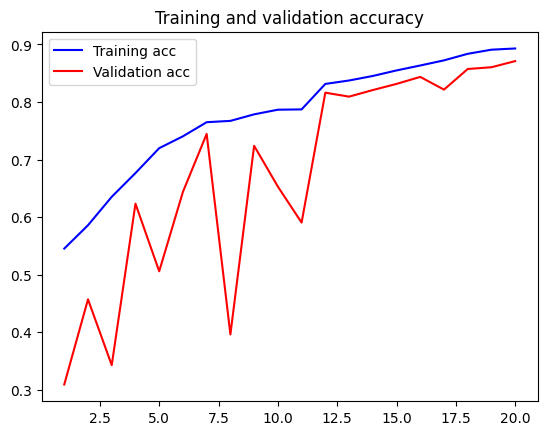

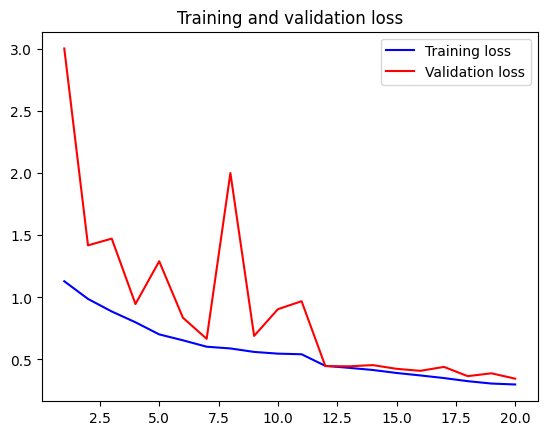

Hyperparameters: LR=0.01, WD=0.001, Model=resnet50
Epoch 1/20, Train Loss: 1.1159, Train Acc: 0.5208, Val Loss: 1.8305, Val Acc: 0.4668
Epoch 2/20, Train Loss: 0.8350, Train Acc: 0.6737, Val Loss: 17.0701, Val Acc: 0.3181
Epoch 3/20, Train Loss: 0.7667, Train Acc: 0.6999, Val Loss: 2.0201, Val Acc: 0.3989
Epoch 4/20, Train Loss: 0.7329, Train Acc: 0.7089, Val Loss: 5.7457, Val Acc: 0.3219
Epoch 5/20, Train Loss: 0.6973, Train Acc: 0.7222, Val Loss: 0.8141, Val Acc: 0.6529
Epoch 6/20, Train Loss: 0.6923, Train Acc: 0.7286, Val Loss: 1.0176, Val Acc: 0.5957
Epoch 7/20, Train Loss: 0.7208, Train Acc: 0.7185, Val Loss: 0.7962, Val Acc: 0.6819
Epoch 8/20, Train Loss: 0.6537, Train Acc: 0.7477, Val Loss: 1.5486, Val Acc: 0.4859
Epoch 9/20, Train Loss: 0.6093, Train Acc: 0.7663, Val Loss: 0.6720, Val Acc: 0.7170
Epoch 10/20, Train Loss: 0.5867, Train Acc: 0.7770, Val Loss: 1.1507, Val Acc: 0.4943
Epoch 11/20, Train Loss: 0.5538, Train Acc: 0.7932, Val Loss: 1.0494, Val Acc: 0.6102
Epoch 12/20

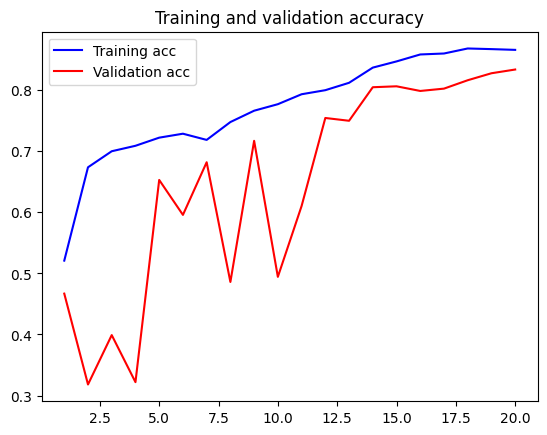

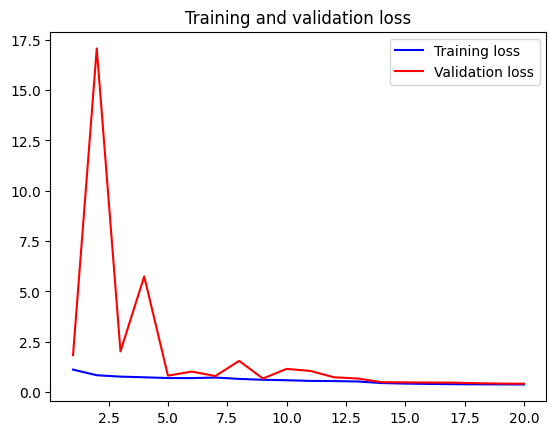

Hyperparameters: LR=0.01, WD=0.0001, Model=resnet18
Epoch 1/20, Train Loss: 1.0158, Train Acc: 0.6091, Val Loss: 1.0059, Val Acc: 0.5744
Epoch 2/20, Train Loss: 0.7566, Train Acc: 0.7045, Val Loss: 1.0319, Val Acc: 0.6156
Epoch 3/20, Train Loss: 0.6991, Train Acc: 0.7227, Val Loss: 0.8900, Val Acc: 0.6186
Epoch 4/20, Train Loss: 0.6508, Train Acc: 0.7454, Val Loss: 0.8657, Val Acc: 0.6621
Epoch 5/20, Train Loss: 0.6121, Train Acc: 0.7577, Val Loss: 1.0554, Val Acc: 0.5706
Epoch 6/20, Train Loss: 0.5628, Train Acc: 0.7841, Val Loss: 2.3170, Val Acc: 0.3440
Epoch 7/20, Train Loss: 0.5252, Train Acc: 0.7945, Val Loss: 0.9606, Val Acc: 0.6629
Epoch 8/20, Train Loss: 0.4981, Train Acc: 0.8085, Val Loss: 0.8976, Val Acc: 0.6659
Epoch 9/20, Train Loss: 0.3531, Train Acc: 0.8654, Val Loss: 0.3506, Val Acc: 0.8543
Epoch 10/20, Train Loss: 0.2922, Train Acc: 0.8927, Val Loss: 0.3314, Val Acc: 0.8673
Epoch 11/20, Train Loss: 0.2422, Train Acc: 0.9168, Val Loss: 0.3273, Val Acc: 0.8802
Epoch 12/20

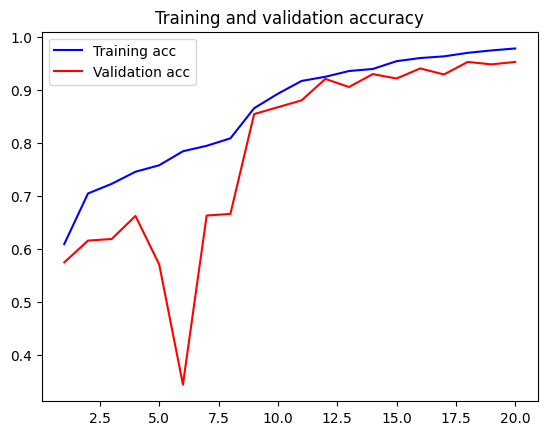

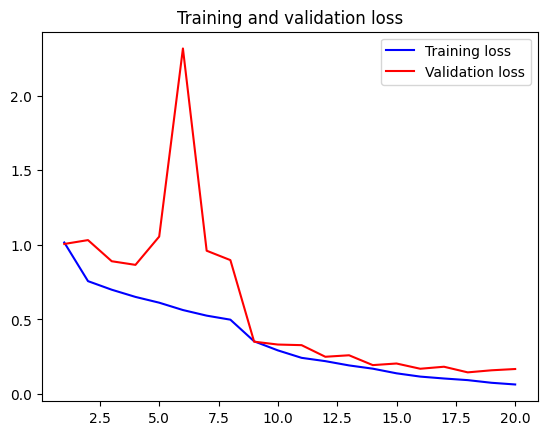

Hyperparameters: LR=0.01, WD=0.0001, Model=resnet50
Epoch 1/20, Train Loss: 1.0771, Train Acc: 0.5586, Val Loss: 0.8537, Val Acc: 0.6537
Epoch 2/20, Train Loss: 0.8283, Train Acc: 0.6689, Val Loss: 2.6917, Val Acc: 0.3234
Epoch 3/20, Train Loss: 0.7651, Train Acc: 0.6982, Val Loss: 1.5881, Val Acc: 0.3959
Epoch 4/20, Train Loss: 0.7119, Train Acc: 0.7178, Val Loss: 1.1216, Val Acc: 0.5805
Epoch 5/20, Train Loss: 0.7037, Train Acc: 0.7201, Val Loss: 0.8218, Val Acc: 0.6514
Epoch 6/20, Train Loss: 0.6672, Train Acc: 0.7351, Val Loss: 0.9862, Val Acc: 0.5927
Epoch 7/20, Train Loss: 0.6372, Train Acc: 0.7465, Val Loss: 2.1185, Val Acc: 0.4539
Epoch 8/20, Train Loss: 0.6077, Train Acc: 0.7638, Val Loss: 2.0793, Val Acc: 0.5156
Epoch 9/20, Train Loss: 0.5814, Train Acc: 0.7757, Val Loss: 0.5713, Val Acc: 0.7704
Epoch 10/20, Train Loss: 0.5498, Train Acc: 0.7864, Val Loss: 0.6429, Val Acc: 0.7002
Epoch 11/20, Train Loss: 0.5142, Train Acc: 0.8064, Val Loss: 0.6377, Val Acc: 0.7338
Epoch 12/20

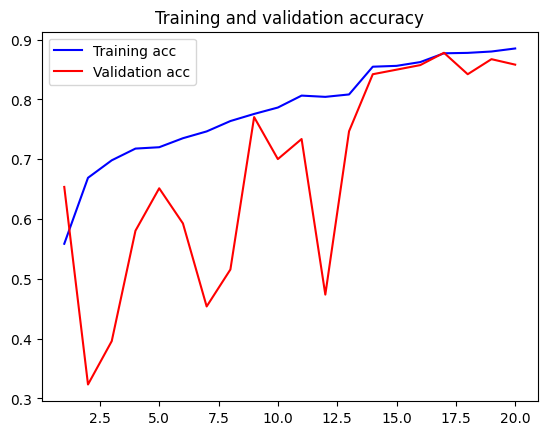

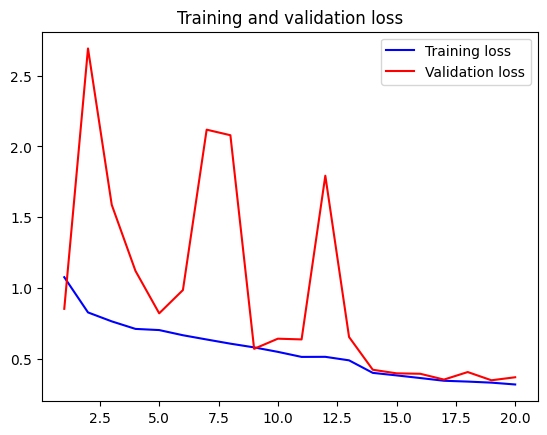

Hyperparameters: LR=0.001, WD=0.01, Model=resnet18
Epoch 1/20, Train Loss: 0.6337, Train Acc: 0.7631, Val Loss: 1.0840, Val Acc: 0.5439
Epoch 2/20, Train Loss: 0.6025, Train Acc: 0.7684, Val Loss: 1.1047, Val Acc: 0.6056
Epoch 3/20, Train Loss: 0.5668, Train Acc: 0.7847, Val Loss: 1.2590, Val Acc: 0.5759
Epoch 4/20, Train Loss: 0.5075, Train Acc: 0.8130, Val Loss: 2.8163, Val Acc: 0.3440
Epoch 5/20, Train Loss: 0.4680, Train Acc: 0.8309, Val Loss: 0.6487, Val Acc: 0.7086
Epoch 6/20, Train Loss: 0.4610, Train Acc: 0.8316, Val Loss: 0.8026, Val Acc: 0.7048
Epoch 7/20, Train Loss: 0.4366, Train Acc: 0.8433, Val Loss: 2.7744, Val Acc: 0.3181
Epoch 8/20, Train Loss: 0.4098, Train Acc: 0.8584, Val Loss: 0.6356, Val Acc: 0.7689
Epoch 9/20, Train Loss: 0.4385, Train Acc: 0.8463, Val Loss: 0.7994, Val Acc: 0.7170
Epoch 10/20, Train Loss: 0.4202, Train Acc: 0.8585, Val Loss: 0.7483, Val Acc: 0.7193
Epoch 11/20, Train Loss: 0.3929, Train Acc: 0.8650, Val Loss: 1.4041, Val Acc: 0.5278
Epoch 12/20,

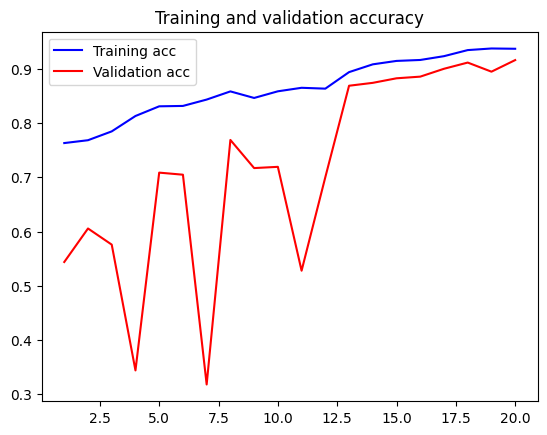

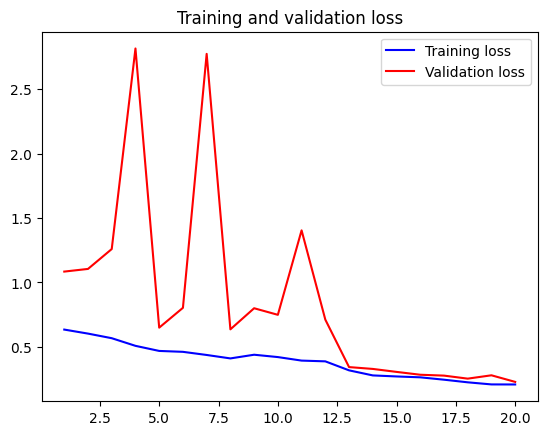

Hyperparameters: LR=0.001, WD=0.01, Model=resnet50
Epoch 1/20, Train Loss: 0.7436, Train Acc: 0.7108, Val Loss: 1.6108, Val Acc: 0.3577
Epoch 2/20, Train Loss: 0.6140, Train Acc: 0.7712, Val Loss: 1.1108, Val Acc: 0.4386
Epoch 3/20, Train Loss: 0.5701, Train Acc: 0.7903, Val Loss: 1.4590, Val Acc: 0.4882
Epoch 4/20, Train Loss: 0.5645, Train Acc: 0.7971, Val Loss: 2.4651, Val Acc: 0.3425
Epoch 5/20, Train Loss: 0.5325, Train Acc: 0.8088, Val Loss: 0.6676, Val Acc: 0.7475
Epoch 6/20, Train Loss: 0.5334, Train Acc: 0.8107, Val Loss: 1.1405, Val Acc: 0.5317
Epoch 7/20, Train Loss: 0.5028, Train Acc: 0.8241, Val Loss: 0.7784, Val Acc: 0.6400
Epoch 8/20, Train Loss: 0.4984, Train Acc: 0.8239, Val Loss: 0.7361, Val Acc: 0.7040
Epoch 9/20, Train Loss: 0.4886, Train Acc: 0.8263, Val Loss: 2.8160, Val Acc: 0.4760
Epoch 10/20, Train Loss: 0.4159, Train Acc: 0.8570, Val Loss: 0.4727, Val Acc: 0.8192
Epoch 11/20, Train Loss: 0.3883, Train Acc: 0.8699, Val Loss: 0.4408, Val Acc: 0.8330
Epoch 12/20,

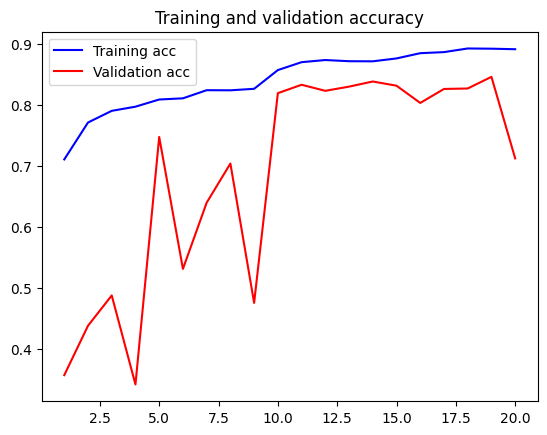

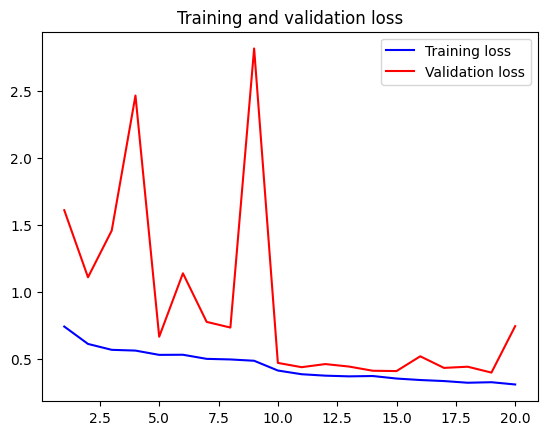

Hyperparameters: LR=0.001, WD=0.001, Model=resnet18
Epoch 1/20, Train Loss: 0.4881, Train Acc: 0.8293, Val Loss: 0.6016, Val Acc: 0.8009
Epoch 2/20, Train Loss: 0.3266, Train Acc: 0.8836, Val Loss: 0.3987, Val Acc: 0.8528
Epoch 3/20, Train Loss: 0.2938, Train Acc: 0.8999, Val Loss: 0.3546, Val Acc: 0.8703
Epoch 4/20, Train Loss: 0.2877, Train Acc: 0.9011, Val Loss: 0.2644, Val Acc: 0.9085
Epoch 5/20, Train Loss: 0.2542, Train Acc: 0.9125, Val Loss: 0.2731, Val Acc: 0.9085
Epoch 6/20, Train Loss: 0.2192, Train Acc: 0.9252, Val Loss: 0.3332, Val Acc: 0.8711
Epoch 7/20, Train Loss: 0.2163, Train Acc: 0.9275, Val Loss: 0.2326, Val Acc: 0.9031
Epoch 8/20, Train Loss: 0.2062, Train Acc: 0.9291, Val Loss: 0.2345, Val Acc: 0.9283
Epoch 9/20, Train Loss: 0.1938, Train Acc: 0.9336, Val Loss: 0.3193, Val Acc: 0.8894
Epoch 10/20, Train Loss: 0.1651, Train Acc: 0.9445, Val Loss: 0.1623, Val Acc: 0.9527
Epoch 11/20, Train Loss: 0.1604, Train Acc: 0.9468, Val Loss: 0.2466, Val Acc: 0.9115
Epoch 12/20

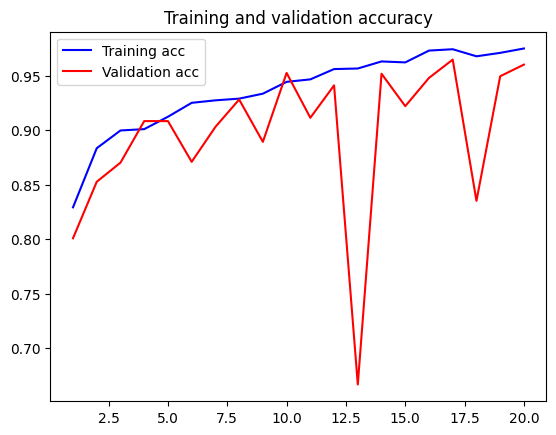

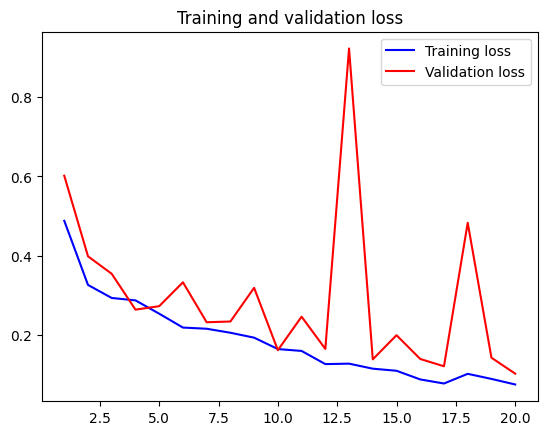

Hyperparameters: LR=0.001, WD=0.001, Model=resnet50
Epoch 1/20, Train Loss: 0.5832, Train Acc: 0.7791, Val Loss: 0.5918, Val Acc: 0.7613
Epoch 2/20, Train Loss: 0.4672, Train Acc: 0.8249, Val Loss: 0.6524, Val Acc: 0.7559
Epoch 3/20, Train Loss: 0.4575, Train Acc: 0.8323, Val Loss: 0.6271, Val Acc: 0.7818
Epoch 4/20, Train Loss: 0.4474, Train Acc: 0.8354, Val Loss: 0.6855, Val Acc: 0.7330
Epoch 5/20, Train Loss: 0.4170, Train Acc: 0.8431, Val Loss: 1.2983, Val Acc: 0.4668
Epoch 6/20, Train Loss: 0.3081, Train Acc: 0.8948, Val Loss: 0.3557, Val Acc: 0.8528
Epoch 7/20, Train Loss: 0.2533, Train Acc: 0.9109, Val Loss: 0.2741, Val Acc: 0.8970
Epoch 8/20, Train Loss: 0.2225, Train Acc: 0.9210, Val Loss: 0.2746, Val Acc: 0.8924
Epoch 9/20, Train Loss: 0.1936, Train Acc: 0.9340, Val Loss: 0.2287, Val Acc: 0.9161
Epoch 10/20, Train Loss: 0.1772, Train Acc: 0.9403, Val Loss: 0.2165, Val Acc: 0.9252
Epoch 11/20, Train Loss: 0.1536, Train Acc: 0.9463, Val Loss: 0.2465, Val Acc: 0.8978
Epoch 12/20

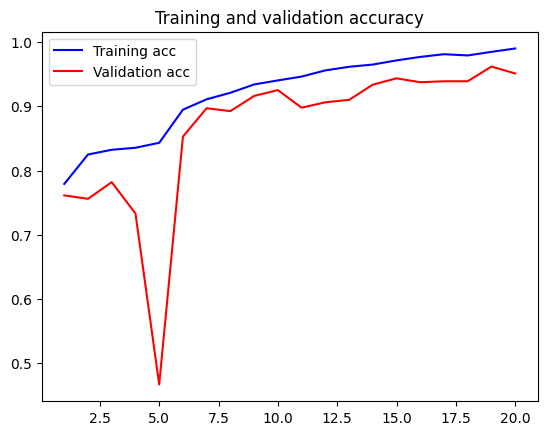

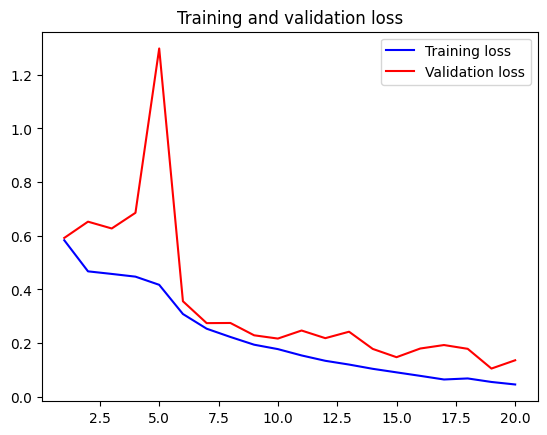

Hyperparameters: LR=0.001, WD=0.0001, Model=resnet18
Epoch 1/20, Train Loss: 0.4239, Train Acc: 0.8477, Val Loss: 1.1244, Val Acc: 0.6629
Epoch 2/20, Train Loss: 0.2647, Train Acc: 0.9079, Val Loss: 0.4285, Val Acc: 0.8589
Epoch 3/20, Train Loss: 0.1953, Train Acc: 0.9319, Val Loss: 0.4646, Val Acc: 0.8284
Epoch 4/20, Train Loss: 0.1488, Train Acc: 0.9482, Val Loss: 0.1427, Val Acc: 0.9519
Epoch 5/20, Train Loss: 0.1161, Train Acc: 0.9589, Val Loss: 0.5889, Val Acc: 0.8169
Epoch 6/20, Train Loss: 0.1215, Train Acc: 0.9576, Val Loss: 0.2762, Val Acc: 0.8986
Epoch 7/20, Train Loss: 0.1053, Train Acc: 0.9648, Val Loss: 0.1634, Val Acc: 0.9420
Epoch 8/20, Train Loss: 0.0905, Train Acc: 0.9708, Val Loss: 0.1187, Val Acc: 0.9535
Epoch 9/20, Train Loss: 0.0856, Train Acc: 0.9680, Val Loss: 0.1485, Val Acc: 0.9428
Epoch 10/20, Train Loss: 0.0763, Train Acc: 0.9772, Val Loss: 0.1333, Val Acc: 0.9542
Epoch 11/20, Train Loss: 0.1128, Train Acc: 0.9625, Val Loss: 0.2853, Val Acc: 0.9031
Epoch 12/2

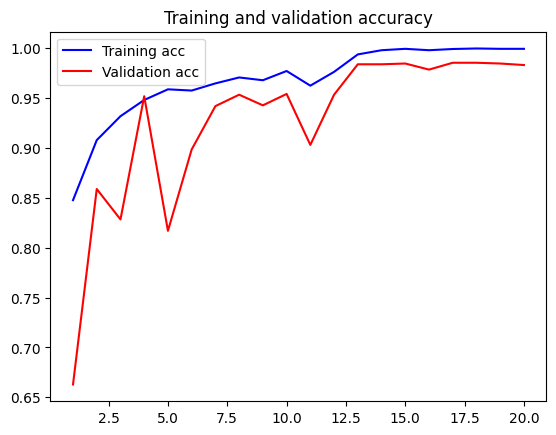

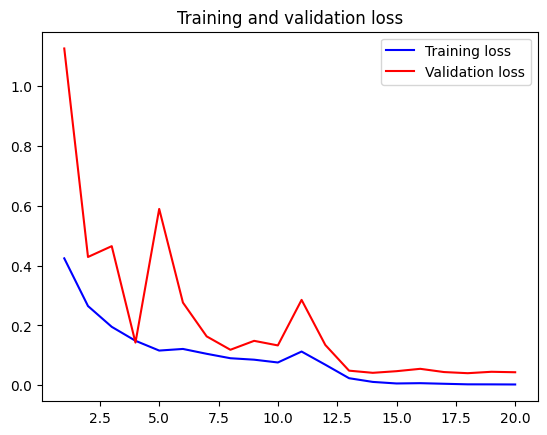

Hyperparameters: LR=0.001, WD=0.0001, Model=resnet50
Epoch 1/20, Train Loss: 0.5780, Train Acc: 0.7808, Val Loss: 0.8832, Val Acc: 0.6735
Epoch 2/20, Train Loss: 0.3749, Train Acc: 0.8638, Val Loss: 0.3835, Val Acc: 0.8482
Epoch 3/20, Train Loss: 0.2870, Train Acc: 0.8986, Val Loss: 0.3517, Val Acc: 0.8719
Epoch 4/20, Train Loss: 0.2596, Train Acc: 0.9093, Val Loss: 0.4966, Val Acc: 0.8291
Epoch 5/20, Train Loss: 0.2300, Train Acc: 0.9181, Val Loss: 1.0733, Val Acc: 0.7323
Epoch 6/20, Train Loss: 0.2131, Train Acc: 0.9291, Val Loss: 0.3765, Val Acc: 0.8703
Epoch 7/20, Train Loss: 0.2229, Train Acc: 0.9207, Val Loss: 0.4196, Val Acc: 0.8749
Epoch 8/20, Train Loss: 0.1063, Train Acc: 0.9639, Val Loss: 0.1049, Val Acc: 0.9626
Epoch 9/20, Train Loss: 0.0697, Train Acc: 0.9767, Val Loss: 0.0909, Val Acc: 0.9725
Epoch 10/20, Train Loss: 0.0504, Train Acc: 0.9827, Val Loss: 0.0877, Val Acc: 0.9703
Epoch 11/20, Train Loss: 0.0375, Train Acc: 0.9872, Val Loss: 0.0880, Val Acc: 0.9764
Epoch 12/2

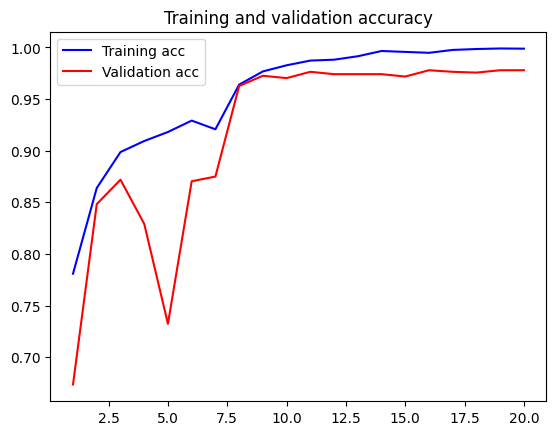

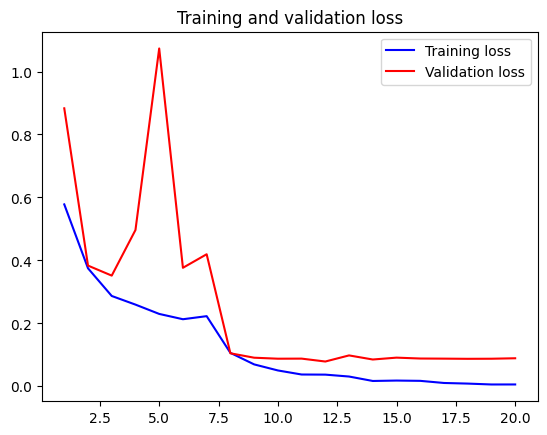

Hyperparameters: LR=0.0001, WD=0.01, Model=resnet18
Epoch 1/20, Train Loss: 0.2219, Train Acc: 0.9242, Val Loss: 0.1016, Val Acc: 0.9619
Epoch 2/20, Train Loss: 0.0952, Train Acc: 0.9688, Val Loss: 0.0492, Val Acc: 0.9870
Epoch 3/20, Train Loss: 0.0940, Train Acc: 0.9688, Val Loss: 0.2091, Val Acc: 0.9275
Epoch 4/20, Train Loss: 0.0555, Train Acc: 0.9814, Val Loss: 0.0790, Val Acc: 0.9718
Epoch 5/20, Train Loss: 0.0756, Train Acc: 0.9755, Val Loss: 0.1031, Val Acc: 0.9634
Epoch 6/20, Train Loss: 0.0675, Train Acc: 0.9769, Val Loss: 0.1417, Val Acc: 0.9489
Epoch 7/20, Train Loss: 0.0252, Train Acc: 0.9933, Val Loss: 0.0285, Val Acc: 0.9939
Epoch 8/20, Train Loss: 0.0106, Train Acc: 0.9982, Val Loss: 0.0258, Val Acc: 0.9947
Epoch 9/20, Train Loss: 0.0074, Train Acc: 0.9988, Val Loss: 0.0391, Val Acc: 0.9893
Epoch 10/20, Train Loss: 0.0052, Train Acc: 0.9995, Val Loss: 0.0248, Val Acc: 0.9954
Epoch 11/20, Train Loss: 0.0035, Train Acc: 0.9996, Val Loss: 0.0244, Val Acc: 0.9954
Epoch 12/20

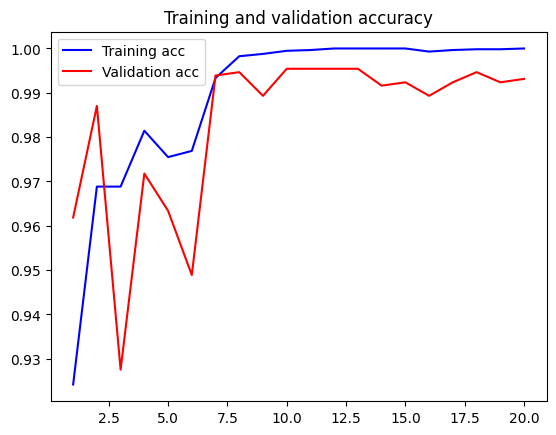

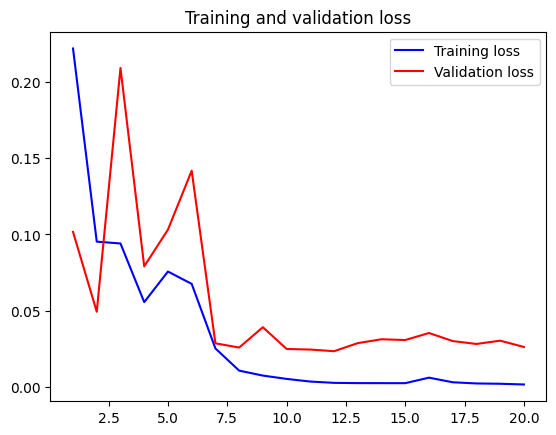

Hyperparameters: LR=0.0001, WD=0.01, Model=resnet50
Epoch 1/20, Train Loss: 0.2605, Train Acc: 0.9107, Val Loss: 0.1483, Val Acc: 0.9565
Epoch 2/20, Train Loss: 0.1417, Train Acc: 0.9568, Val Loss: 0.2148, Val Acc: 0.9336
Epoch 3/20, Train Loss: 0.1297, Train Acc: 0.9580, Val Loss: 0.2009, Val Acc: 0.9184
Epoch 4/20, Train Loss: 0.1479, Train Acc: 0.9512, Val Loss: 0.1256, Val Acc: 0.9527
Epoch 5/20, Train Loss: 0.1193, Train Acc: 0.9613, Val Loss: 0.2806, Val Acc: 0.9001
Epoch 6/20, Train Loss: 0.1001, Train Acc: 0.9683, Val Loss: 0.1009, Val Acc: 0.9664
Epoch 7/20, Train Loss: 0.1453, Train Acc: 0.9534, Val Loss: 0.2305, Val Acc: 0.9054
Epoch 8/20, Train Loss: 0.1128, Train Acc: 0.9641, Val Loss: 0.3935, Val Acc: 0.8558
Epoch 9/20, Train Loss: 0.1106, Train Acc: 0.9669, Val Loss: 0.0989, Val Acc: 0.9748
Epoch 10/20, Train Loss: 0.1198, Train Acc: 0.9620, Val Loss: 0.1785, Val Acc: 0.9436
Epoch 11/20, Train Loss: 0.0798, Train Acc: 0.9792, Val Loss: 0.1013, Val Acc: 0.9703
Epoch 12/20

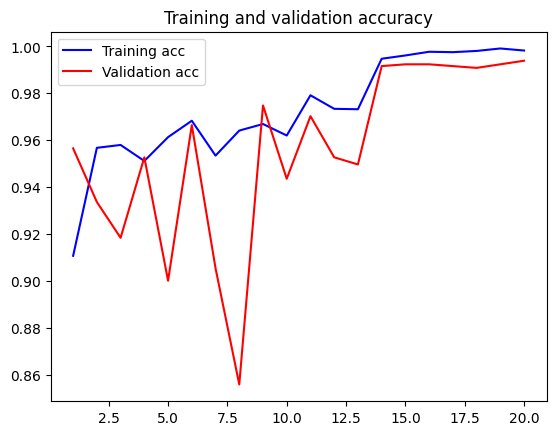

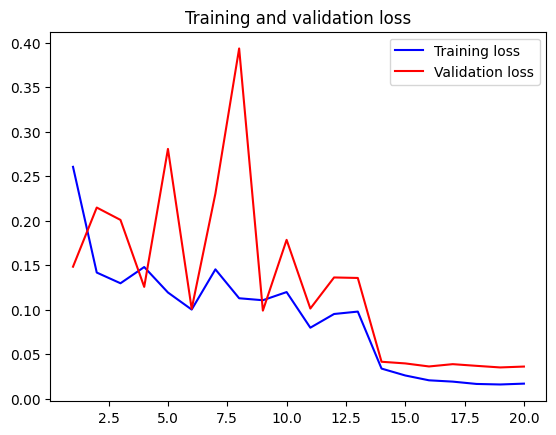

Hyperparameters: LR=0.0001, WD=0.001, Model=resnet18
Epoch 1/20, Train Loss: 0.2195, Train Acc: 0.9226, Val Loss: 0.3007, Val Acc: 0.8726
Epoch 2/20, Train Loss: 0.0600, Train Acc: 0.9809, Val Loss: 0.0490, Val Acc: 0.9832
Epoch 3/20, Train Loss: 0.0364, Train Acc: 0.9893, Val Loss: 0.0262, Val Acc: 0.9924
Epoch 4/20, Train Loss: 0.0442, Train Acc: 0.9869, Val Loss: 0.0851, Val Acc: 0.9741
Epoch 5/20, Train Loss: 0.0262, Train Acc: 0.9919, Val Loss: 0.0528, Val Acc: 0.9847
Epoch 6/20, Train Loss: 0.0178, Train Acc: 0.9956, Val Loss: 0.0393, Val Acc: 0.9855
Epoch 7/20, Train Loss: 0.0241, Train Acc: 0.9932, Val Loss: 0.0771, Val Acc: 0.9794
Epoch 8/20, Train Loss: 0.0103, Train Acc: 0.9974, Val Loss: 0.0264, Val Acc: 0.9908
Epoch 9/20, Train Loss: 0.0031, Train Acc: 0.9998, Val Loss: 0.0269, Val Acc: 0.9916
Epoch 10/20, Train Loss: 0.0030, Train Acc: 0.9996, Val Loss: 0.0255, Val Acc: 0.9931
Epoch 11/20, Train Loss: 0.0024, Train Acc: 0.9995, Val Loss: 0.0206, Val Acc: 0.9924
Epoch 12/2

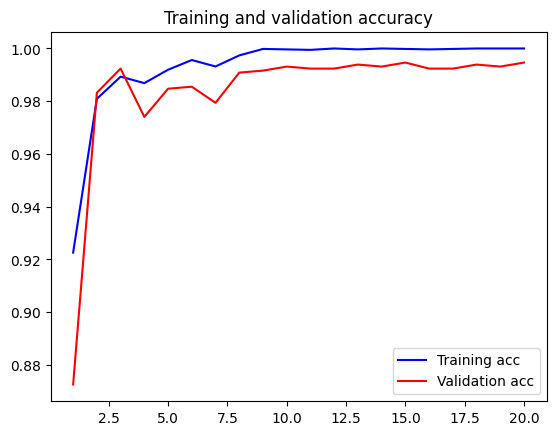

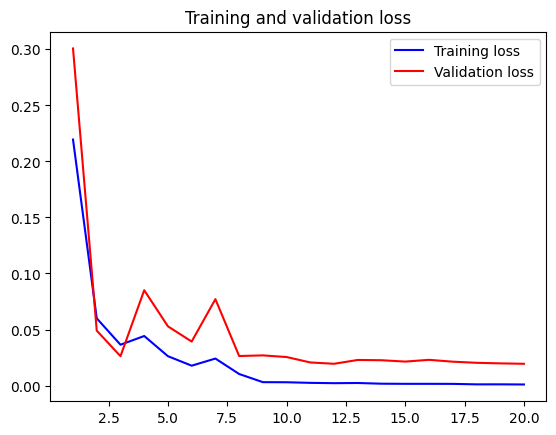

Hyperparameters: LR=0.0001, WD=0.001, Model=resnet50
Epoch 1/20, Train Loss: 0.2416, Train Acc: 0.9167, Val Loss: 0.1362, Val Acc: 0.9428
Epoch 2/20, Train Loss: 0.0998, Train Acc: 0.9694, Val Loss: 0.0698, Val Acc: 0.9764
Epoch 3/20, Train Loss: 0.0609, Train Acc: 0.9823, Val Loss: 0.0813, Val Acc: 0.9809
Epoch 4/20, Train Loss: 0.0583, Train Acc: 0.9818, Val Loss: 0.1311, Val Acc: 0.9580
Epoch 5/20, Train Loss: 0.0393, Train Acc: 0.9883, Val Loss: 0.0794, Val Acc: 0.9695
Epoch 6/20, Train Loss: 0.0368, Train Acc: 0.9895, Val Loss: 0.0631, Val Acc: 0.9741
Epoch 7/20, Train Loss: 0.0467, Train Acc: 0.9863, Val Loss: 0.0804, Val Acc: 0.9786
Epoch 8/20, Train Loss: 0.0450, Train Acc: 0.9865, Val Loss: 0.0955, Val Acc: 0.9733
Epoch 9/20, Train Loss: 0.0297, Train Acc: 0.9916, Val Loss: 0.0429, Val Acc: 0.9893
Epoch 10/20, Train Loss: 0.0550, Train Acc: 0.9823, Val Loss: 0.1080, Val Acc: 0.9649
Epoch 11/20, Train Loss: 0.0347, Train Acc: 0.9902, Val Loss: 0.0527, Val Acc: 0.9870
Epoch 12/2

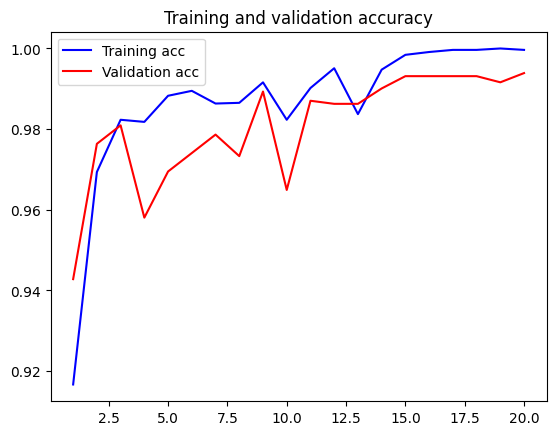

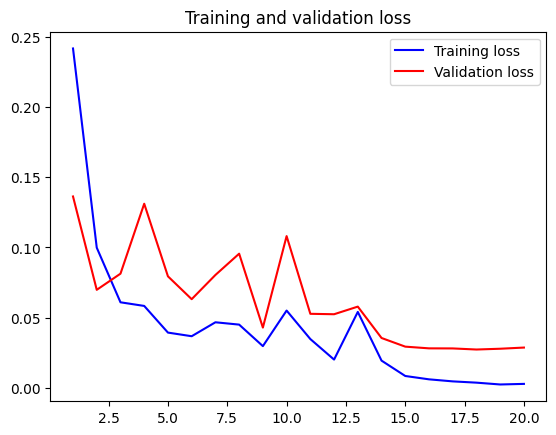

Hyperparameters: LR=0.0001, WD=0.0001, Model=resnet18
Epoch 1/20, Train Loss: 0.2267, Train Acc: 0.9177, Val Loss: 0.1009, Val Acc: 0.9634
Epoch 2/20, Train Loss: 0.0662, Train Acc: 0.9809, Val Loss: 0.0782, Val Acc: 0.9794
Epoch 3/20, Train Loss: 0.0330, Train Acc: 0.9916, Val Loss: 0.0628, Val Acc: 0.9756
Epoch 4/20, Train Loss: 0.0208, Train Acc: 0.9946, Val Loss: 0.0395, Val Acc: 0.9855
Epoch 5/20, Train Loss: 0.0214, Train Acc: 0.9932, Val Loss: 0.0367, Val Acc: 0.9901
Epoch 6/20, Train Loss: 0.0197, Train Acc: 0.9946, Val Loss: 0.0313, Val Acc: 0.9916
Epoch 7/20, Train Loss: 0.0038, Train Acc: 0.9996, Val Loss: 0.0214, Val Acc: 0.9931
Epoch 8/20, Train Loss: 0.0014, Train Acc: 1.0000, Val Loss: 0.0246, Val Acc: 0.9916
Epoch 9/20, Train Loss: 0.0010, Train Acc: 1.0000, Val Loss: 0.0245, Val Acc: 0.9931
Epoch 10/20, Train Loss: 0.0493, Train Acc: 0.9832, Val Loss: 0.0691, Val Acc: 0.9794
Epoch 11/20, Train Loss: 0.0196, Train Acc: 0.9940, Val Loss: 0.0264, Val Acc: 0.9939
Epoch 12/

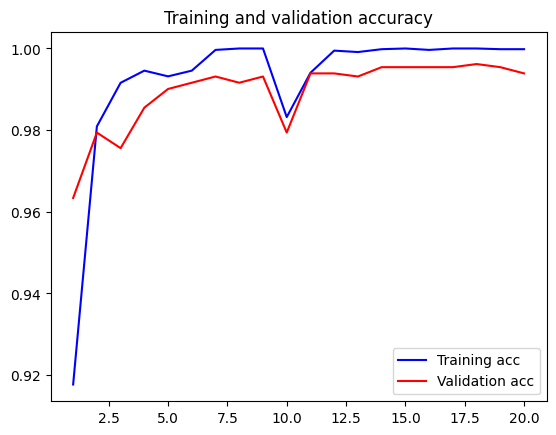

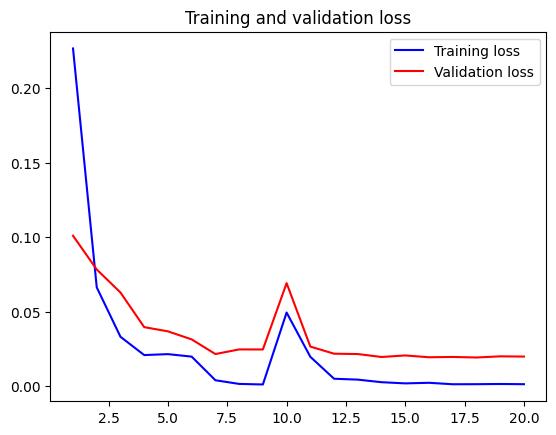

Hyperparameters: LR=0.0001, WD=0.0001, Model=resnet50
Epoch 1/20, Train Loss: 0.2441, Train Acc: 0.9130, Val Loss: 0.1697, Val Acc: 0.9405
Epoch 2/20, Train Loss: 0.0790, Train Acc: 0.9755, Val Loss: 0.1743, Val Acc: 0.9329
Epoch 3/20, Train Loss: 0.0442, Train Acc: 0.9863, Val Loss: 0.0931, Val Acc: 0.9672
Epoch 4/20, Train Loss: 0.0583, Train Acc: 0.9823, Val Loss: 0.1285, Val Acc: 0.9504
Epoch 5/20, Train Loss: 0.0310, Train Acc: 0.9911, Val Loss: 0.0433, Val Acc: 0.9886
Epoch 6/20, Train Loss: 0.0207, Train Acc: 0.9944, Val Loss: 0.0487, Val Acc: 0.9840
Epoch 7/20, Train Loss: 0.0221, Train Acc: 0.9928, Val Loss: 0.0420, Val Acc: 0.9893
Epoch 8/20, Train Loss: 0.0390, Train Acc: 0.9877, Val Loss: 0.0393, Val Acc: 0.9863
Epoch 9/20, Train Loss: 0.0096, Train Acc: 0.9974, Val Loss: 0.0139, Val Acc: 0.9947
Epoch 10/20, Train Loss: 0.0021, Train Acc: 1.0000, Val Loss: 0.0094, Val Acc: 0.9977
Epoch 11/20, Train Loss: 0.0009, Train Acc: 1.0000, Val Loss: 0.0114, Val Acc: 0.9969
Epoch 12/

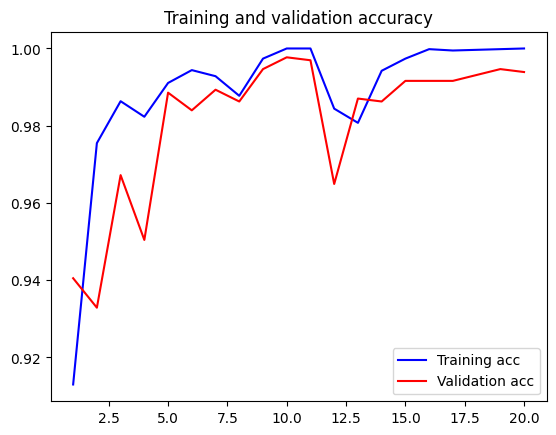

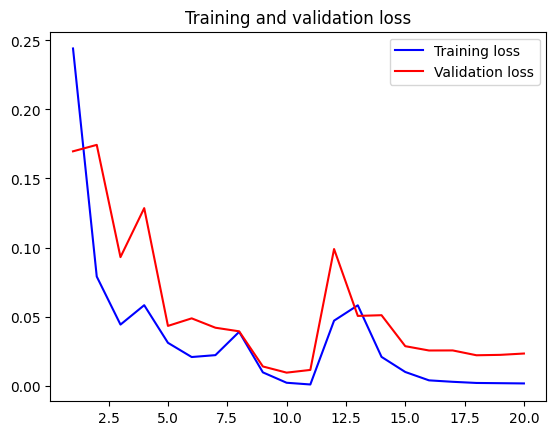

Best hyperparameters: {'lr': 0.0001, 'wd': 0.001, 'model': 'resnet18'}
Best validation accuracy: 0.9946605644546148


In [24]:
def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, num_epochs=20):
    train_acc_list = []
    val_acc_list = []
    train_loss_list = []
    val_loss_list = []

    for epoch in range(num_epochs):
        # Train the model
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item() * inputs.size(0)

        train_acc = correct_train / total_train
        train_loss = running_train_loss / len(train_loader.dataset)
        train_acc_list.append(train_acc)
        train_loss_list.append(train_loss)

        # Validate the model
        model.eval()
        running_val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item() * inputs.size(0)

        val_acc = correct_val / total_val
        val_loss = running_val_loss / len(val_loader.dataset)
        val_acc_list.append(val_acc)
        val_loss_list.append(val_loss)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

        # Step the scheduler
        scheduler.step(val_loss)

    return train_acc_list, val_acc_list, train_loss_list, val_loss_list

# Function to visualize training accuracy
def plot_training_results(train_acc_list, val_acc_list, train_loss_list, val_loss_list):
    epochs = range(1, len(train_acc_list) + 1)
    plt.plot(epochs, train_acc_list, 'b', label='Training acc')
    plt.plot(epochs, val_acc_list, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, train_loss_list, 'b', label='Training loss')
    plt.plot(epochs, val_loss_list, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

# Hyperparameters and models to try
learning_rates = [0.01, 0.001, 0.0001]
weight_decays = [0.01, 0.001, 0.0001]
models_to_try = ['resnet18', 'resnet50']

# Grid search
best_val_acc = 0.0
best_hyperparams = None
best_model = None

num_classes = len(train_dataset.classes)

for lr in learning_rates:
    for wd in weight_decays:
        for model_name in models_to_try:
            print(f'Hyperparameters: LR={lr}, WD={wd}, Model={model_name}')
            device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
            if model_name == 'resnet18':
                model = models.resnet18(pretrained=True)
            elif model_name == 'resnet50':
                model = models.resnet50(pretrained=True)

            num_ftrs = model.fc.in_features
            model.fc = nn.Linear(num_ftrs, num_classes)

            model = model.to(device)

            # Define optimizer and scheduler
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=wd)
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=3)
            
            # Define the loss function
            criterion = nn.CrossEntropyLoss()

            # Train the model
            train_acc_list, val_acc_list, train_loss_list, val_loss_list = train_model(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler)

            # Plot training results
            plot_training_results(train_acc_list, val_acc_list, train_loss_list, val_loss_list)

            # Check if this model has the best validation accuracy
            if val_acc_list[-1] > best_val_acc:
                    best_val_acc = val_acc_list[-1]
                    best_hyperparams = {'lr': lr, 'wd': wd, 'model': model_name}
                    best_model = model

print('Best hyperparameters:', best_hyperparams)
print('Best validation accuracy:', best_val_acc)

# Save the best model
torch.save(best_model.state_dict(), 'best_model.pt')